## Global Settings and Imports

In [1]:
# jupyter notebook에서 import 해서 쓰는 모듈의 코드가 변경될 시, 변동 사항을 자동으로 반영해주는 기능 켜기
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys

PROJECT_DIR = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))
sys.path.append(PROJECT_DIR)

from utils.model_manager import ModelManager, ManagerArgs

c:\Users\USER\anaconda3\envs\newsrec\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Prepare parameters

In [3]:
args = ManagerArgs(
    config_path = "config/model/sentirec/vader_manual1.yaml"
    # resume_ckpt_path = None
    # test_ckpt_path = None
)

## 1. train 모드로 시작

In [4]:
model_manager = ModelManager(args, "train")

Seed set to 1234
100%|██████████| 1/1 [00:00<00:00, 1001.51it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


In [ ]:
print(model_manager.config)

BaseConfig(name='sentirec', dataset_size='manual', preprocess_data_dir='data/preprocessed_data/manual', seed=1234, train_behavior='train/train_behavior.tsv', val_behavior='train/val_behavior.tsv', test_behavior='test/test_behavior.tsv', train_news='train/parsed_news.tsv', test_news='test/parsed_news.tsv', user2int='train/user2int.tsv', word2int='test/word2int.tsv', category2int='train/category2int.tsv', embedding_weights='test/embedding_weights.csv', max_history=200, num_words_title=100, num_words_abstract=100, num_categories=275, learning_rate=0.0001, dropout_probability=0.2, query_vector_dim=200, num_attention_heads=15, word_embedding_dim=300, freeze_word_embeddings=False, checkpoint=CheckpointConfig(dirpath='logs/lightning_logs/checkpoints/sentirec/vader_manual1', filename='{epoch}-{val_auc_epoch:.4f}', save_top_k=3, verbose=True, monitor='val_auc_epoch', mode='max', save_last=True), logger=LoggerConfig(save_dir='logs/lightning_logs/tensorboard', name='sentirec', version='vader_manu

In [6]:
best_model_path = model_manager.fit()

c:\Users\USER\anaconda3\envs\newsrec\lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:654: Checkpoint directory C:\Users\USER\Desktop\projects\python\newsrecommend\SentiRecTest\project\logs\lightning_logs\checkpoints\sentirec\vader_manual1 exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name                                   | Type             | Params | Mode 
-------------------------------------------------------------------------------------
0  | news_encoder                           | TimeDistributed  | 1.4 M  | train
1  | user_encoder                           | UserEncoder      | 421 K  | train
2  | sentiment_predictor                    | Linear           | 301    | train
3  | val_performance_metrics                | MetricCollection | 0      | train
4  | val_sentiment_diversity_metrics_vader  | MetricCollection | 0      | train
5  | val_sentiment_diversity_metrics_bert   | MetricCollection | 0      | train
6  | test_performance_metrics

Sanity Checking DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]

c:\Users\USER\anaconda3\envs\newsrec\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


c:\Users\USER\anaconda3\envs\newsrec\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
c:\Users\USER\anaconda3\envs\newsrec\lib\site-packages\pytorch_lightning\loops\fit_loop.py:310: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 0: 100%|██████████| 1/1 [00:00<00:00,  7.19it/s, v_num=ual1]

Metric val_auc_epoch improved. New best score: 0.178
Epoch 0, global step 1: 'val_auc_epoch' reached 0.17778 (best 0.17778), saving model to 'C:\\Users\\USER\\Desktop\\projects\\python\\newsrecommend\\SentiRecTest\\project\\logs\\lightning_logs\\checkpoints\\sentirec\\vader_manual1\\epoch=0-val_auc_epoch=0.1778.ckpt' as top 3


Epoch 1: 100%|██████████| 1/1 [00:00<00:00, 14.49it/s, v_num=ual1]

Metric val_auc_epoch improved by 0.044 >= min_delta = 0.0001. New best score: 0.222
Epoch 1, global step 2: 'val_auc_epoch' reached 0.22222 (best 0.22222), saving model to 'C:\\Users\\USER\\Desktop\\projects\\python\\newsrecommend\\SentiRecTest\\project\\logs\\lightning_logs\\checkpoints\\sentirec\\vader_manual1\\epoch=1-val_auc_epoch=0.2222.ckpt' as top 3


Epoch 2: 100%|██████████| 1/1 [00:00<00:00, 13.70it/s, v_num=ual1]

Metric val_auc_epoch improved by 0.156 >= min_delta = 0.0001. New best score: 0.378
Epoch 2, global step 3: 'val_auc_epoch' reached 0.37778 (best 0.37778), saving model to 'C:\\Users\\USER\\Desktop\\projects\\python\\newsrecommend\\SentiRecTest\\project\\logs\\lightning_logs\\checkpoints\\sentirec\\vader_manual1\\epoch=2-val_auc_epoch=0.3778.ckpt' as top 3


Epoch 3: 100%|██████████| 1/1 [00:00<00:00, 14.08it/s, v_num=ual1]

Metric val_auc_epoch improved by 0.311 >= min_delta = 0.0001. New best score: 0.689
Epoch 3, global step 4: 'val_auc_epoch' reached 0.68889 (best 0.68889), saving model to 'C:\\Users\\USER\\Desktop\\projects\\python\\newsrecommend\\SentiRecTest\\project\\logs\\lightning_logs\\checkpoints\\sentirec\\vader_manual1\\epoch=3-val_auc_epoch=0.6889.ckpt' as top 3


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 14.49it/s, v_num=ual1]

Metric val_auc_epoch improved by 0.044 >= min_delta = 0.0001. New best score: 0.733
Epoch 4, global step 5: 'val_auc_epoch' reached 0.73333 (best 0.73333), saving model to 'C:\\Users\\USER\\Desktop\\projects\\python\\newsrecommend\\SentiRecTest\\project\\logs\\lightning_logs\\checkpoints\\sentirec\\vader_manual1\\epoch=4-val_auc_epoch=0.7333.ckpt' as top 3


Epoch 5: 100%|██████████| 1/1 [00:00<00:00, 14.29it/s, v_num=ual1]

Metric val_auc_epoch improved by 0.044 >= min_delta = 0.0001. New best score: 0.778
Epoch 5, global step 6: 'val_auc_epoch' reached 0.77778 (best 0.77778), saving model to 'C:\\Users\\USER\\Desktop\\projects\\python\\newsrecommend\\SentiRecTest\\project\\logs\\lightning_logs\\checkpoints\\sentirec\\vader_manual1\\epoch=5-val_auc_epoch=0.7778.ckpt' as top 3


Epoch 6: 100%|██████████| 1/1 [00:00<00:00, 12.19it/s, v_num=ual1]

Metric val_auc_epoch improved by 0.044 >= min_delta = 0.0001. New best score: 0.822
Epoch 6, global step 7: 'val_auc_epoch' reached 0.82222 (best 0.82222), saving model to 'C:\\Users\\USER\\Desktop\\projects\\python\\newsrecommend\\SentiRecTest\\project\\logs\\lightning_logs\\checkpoints\\sentirec\\vader_manual1\\epoch=6-val_auc_epoch=0.8222.ckpt' as top 3


Epoch 7: 100%|██████████| 1/1 [00:00<00:00, 14.93it/s, v_num=ual1]

Epoch 7, global step 8: 'val_auc_epoch' reached 0.82222 (best 0.82222), saving model to 'C:\\Users\\USER\\Desktop\\projects\\python\\newsrecommend\\SentiRecTest\\project\\logs\\lightning_logs\\checkpoints\\sentirec\\vader_manual1\\epoch=7-val_auc_epoch=0.8222.ckpt' as top 3


Epoch 8: 100%|██████████| 1/1 [00:00<00:00, 13.70it/s, v_num=ual1]

Epoch 8, global step 9: 'val_auc_epoch' reached 0.82222 (best 0.82222), saving model to 'C:\\Users\\USER\\Desktop\\projects\\python\\newsrecommend\\SentiRecTest\\project\\logs\\lightning_logs\\checkpoints\\sentirec\\vader_manual1\\epoch=8-val_auc_epoch=0.8222.ckpt' as top 3


Epoch 9: 100%|██████████| 1/1 [00:00<00:00, 14.71it/s, v_num=ual1]

Metric val_auc_epoch improved by 0.022 >= min_delta = 0.0001. New best score: 0.844
Epoch 9, global step 10: 'val_auc_epoch' reached 0.84444 (best 0.84444), saving model to 'C:\\Users\\USER\\Desktop\\projects\\python\\newsrecommend\\SentiRecTest\\project\\logs\\lightning_logs\\checkpoints\\sentirec\\vader_manual1\\epoch=9-val_auc_epoch=0.8444.ckpt' as top 3


Epoch 10: 100%|██████████| 1/1 [00:00<00:00, 14.29it/s, v_num=ual1]

Epoch 10, global step 11: 'val_auc_epoch' reached 0.84444 (best 0.84444), saving model to 'C:\\Users\\USER\\Desktop\\projects\\python\\newsrecommend\\SentiRecTest\\project\\logs\\lightning_logs\\checkpoints\\sentirec\\vader_manual1\\epoch=10-val_auc_epoch=0.8444-v14.ckpt' as top 3


Epoch 11: 100%|██████████| 1/1 [00:00<00:00, 14.71it/s, v_num=ual1]

Epoch 11, global step 12: 'val_auc_epoch' reached 0.84444 (best 0.84444), saving model to 'C:\\Users\\USER\\Desktop\\projects\\python\\newsrecommend\\SentiRecTest\\project\\logs\\lightning_logs\\checkpoints\\sentirec\\vader_manual1\\epoch=11-val_auc_epoch=0.8444-v14.ckpt' as top 3


Epoch 12: 100%|██████████| 1/1 [00:00<00:00, 14.49it/s, v_num=ual1]

Metric val_auc_epoch improved by 0.022 >= min_delta = 0.0001. New best score: 0.867
Epoch 12, global step 13: 'val_auc_epoch' reached 0.86667 (best 0.86667), saving model to 'C:\\Users\\USER\\Desktop\\projects\\python\\newsrecommend\\SentiRecTest\\project\\logs\\lightning_logs\\checkpoints\\sentirec\\vader_manual1\\epoch=12-val_auc_epoch=0.8667-v14.ckpt' as top 3


Epoch 13: 100%|██████████| 1/1 [00:00<00:00, 14.08it/s, v_num=ual1]

Epoch 13, global step 14: 'val_auc_epoch' was not in top 3


Epoch 14: 100%|██████████| 1/1 [00:00<00:00, 14.49it/s, v_num=ual1]

Epoch 14, global step 15: 'val_auc_epoch' was not in top 3


Epoch 15: 100%|██████████| 1/1 [00:00<00:00, 14.71it/s, v_num=ual1]

Epoch 15, global step 16: 'val_auc_epoch' was not in top 3


Epoch 16: 100%|██████████| 1/1 [00:00<00:00, 14.71it/s, v_num=ual1]

Epoch 16, global step 17: 'val_auc_epoch' was not in top 3


Epoch 17: 100%|██████████| 1/1 [00:00<00:00, 13.89it/s, v_num=ual1]

Monitored metric val_auc_epoch did not improve in the last 5 records. Best score: 0.867. Signaling Trainer to stop.
Epoch 17, global step 18: 'val_auc_epoch' was not in top 3


Epoch 17: 100%|██████████| 1/1 [00:00<00:00,  5.66it/s, v_num=ual1]


## 2. test 모드로 변경

In [ ]:
model_manager.change_to_test(best_model_path)

Seed set to 1234
100%|██████████| 1/1 [00:00<00:00, 1000.07it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


In [20]:
test_result = model_manager.test()

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
c:\Users\USER\anaconda3\envs\newsrec\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:425: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Testing DataLoader 0: 100%|██████████| 1/1 [00:00<00:00,  7.58it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
         Test metric                 DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       test_auc_epoch             0.7777777910232544
test_ils_senti@10_bert_epoch      0.43403464555740356
test_ils_senti@10_vader_epoch     0.22488000988960266
 test_ils_senti@5_bert_epoch      0.5201636552810669
test_ils_senti@5_vader_epoch      0.16557000577449799
   test_ils_topic@10_epoch        0.08888886123895645
   test_ils_topic@5_epoch                 0.0
       test_mrr_epoch             0.3333333432674408
     test_ndcg@10_epoch                   0.5
      test_ndcg@5_epoch                   0.5
  test_senti@10_bert_epoch        0.11298489570617676
  test_senti@10_vader_epoch               0.0
   test_senti@5_bert_epoch 

In [ ]:
print(test_result)

{'sentirec#vader_manual1': {'test_auc_epoch': 0.7777777910232544,
  'test_mrr_epoch': 0.3333333432674408,
  'test_ndcg@10_epoch': 0.5,
  'test_ndcg@5_epoch': 0.5,
  'test_senti@10_vader_epoch': 0.0,
  'test_senti@5_vader_epoch': 0.00020492337353061885,
  'test_senti_mrr_vader_epoch': 0.0,
  'test_senti@10_bert_epoch': 0.11298489570617676,
  'test_senti@5_bert_epoch': 0.045690715312957764,
  'test_senti_mrr_bert_epoch': 0.021202029660344124,
  'test_topic_div@10_epoch': 0.6666666865348816,
  'test_topic_div@5_epoch': 0.43481317162513733,
  'test_topic_mrr_epoch': 0.3810868561267853,
  'test_ils_senti@10_vader_epoch': 0.22488000988960266,
  'test_ils_senti@5_vader_epoch': 0.16557000577449799,
  'test_ils_senti@10_bert_epoch': 0.43403464555740356,
  'test_ils_senti@5_bert_epoch': 0.5201636552810669,
  'test_ils_topic@10_epoch': 0.08888886123895645,
  'test_ils_topic@5_epoch': 0.0}}

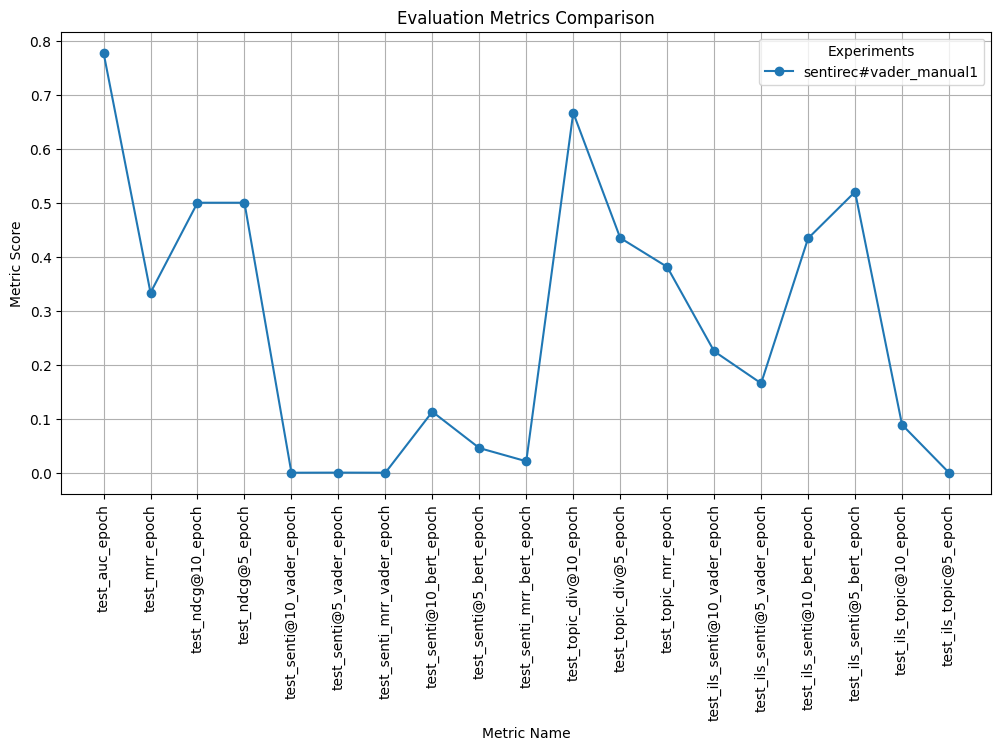

In [23]:
from utils.test_metrics_viewer import TestMetricsViewer

result_viewer = TestMetricsViewer(test_result)
result_viewer.set_config(size=(12, 6))
result_viewer.show()

### 시각화 버전 2

In [ ]:
import matplotlib.pyplot as plt

metrics = test_result
keys = metrics.keys()
values = metrics.values()

# 그림 크기 설정
plt.figure(figsize=(8, 6))

# 막대 그래프
plt.bar(keys, values)

# 레이블 회전 + 정렬
plt.xticks(rotation=90)
plt.ylabel("Metric Score")
plt.title("Test Results by Metric")

# 레이아웃 깔끔하게
plt.tight_layout()

# 출력
plt.show()